<a href="https://colab.research.google.com/github/varofr/proyecto_inferencia/blob/main/2DO_ENTREGABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:


# Lectura y procesamiento de datos
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/water_potability.csv'
df = pd.read_csv(file_path)
water_potability = df.copy()

# Imputación con la mediana directamente
for column in ['ph', 'Sulfate', 'Trihalomethanes']:
    water_potability[column] = water_potability[column].fillna(water_potability[column].median())

# Identificación y eliminación de outliers
Q1 = water_potability.quantile(0.25)
Q3 = water_potability.quantile(0.75)
IQR = Q3 - Q1
water_potability_cleaned = water_potability[~((water_potability < (Q1 - 1.5 * IQR)) | (water_potability > (Q3 + 1.5 * IQR))).any(axis=1)]

# Estandarización y normalización
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
water_potability_scaled = pd.DataFrame(scaler_standard.fit_transform(water_potability_cleaned[['ph', 'Sulfate', 'Trihalomethanes']]),
                                       columns=['ph', 'Sulfate', 'Trihalomethanes'])

scaler_minmax = MinMaxScaler()
water_potability_normalized = pd.DataFrame(scaler_minmax.fit_transform(water_potability_cleaned[['ph', 'Sulfate', 'Trihalomethanes']]),
                                           columns=['ph', 'Sulfate', 'Trihalomethanes'])

# Comprobación de estadísticas descriptivas
print("Media y desviación estándar después de la estandarización")
print(water_potability_scaled.mean())  # Debería ser aproximadamente 0
print(water_potability_scaled.std())   # Debería ser aproximadamente 1

print("Mínimo y máximo después de la normalización")
print(water_potability_normalized.min())  # Debería ser 0
print(water_potability_normalized.max())  # Debería ser 1


Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
[main 64b6705] Primer commit
 1 file changed, 1 insertion(+)
fatal: could not read Username for 'https://github.com': No such device or address
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Media y desviación estándar después de la estandarización
ph                 1.159363e-15
Sulfate            7.862345e-16
Trihalomethanes    7.515868e-16
dtype: float64
ph                 1.000188
Sulfate            1.000188
Trihalomethanes    1.000188
dtype: float64
Mínimo y máximo después de la normalización
ph                 0.0
Sulfate            0.0
Trihalomethanes    0.0
dtype: float64
ph                 1.0
Sulfate            1.0
Trihalomethanes    1.0
dtype: float64


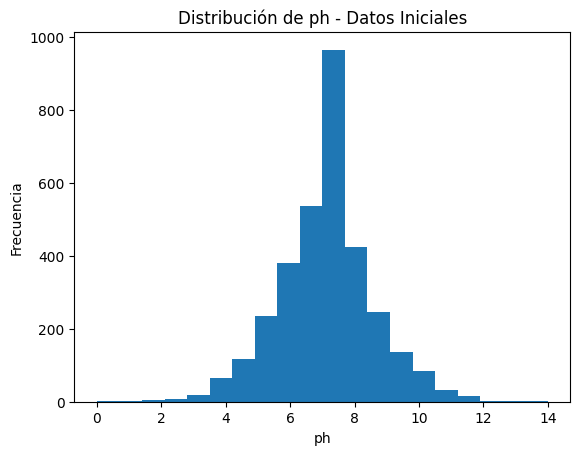

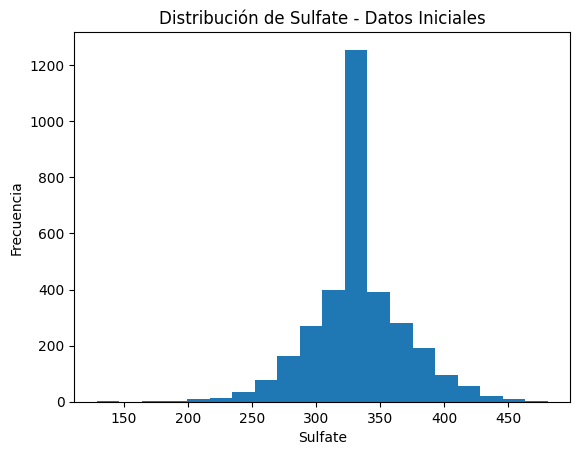

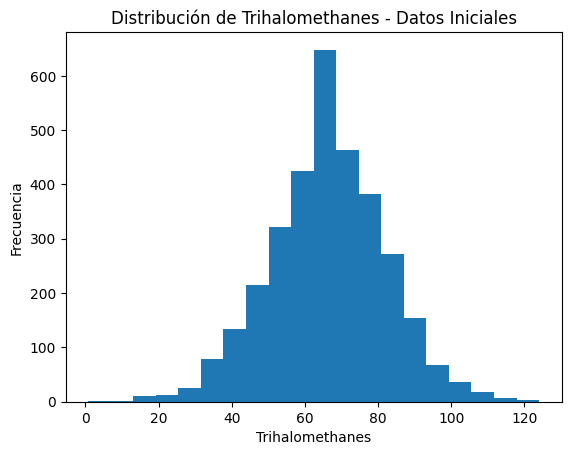

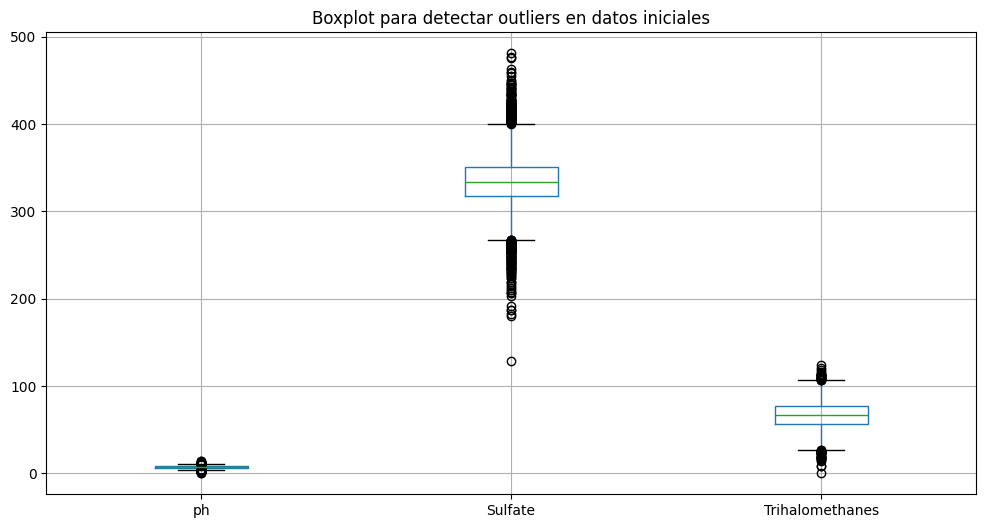

In [2]:
import matplotlib.pyplot as plt

# Histograma inicial para ver la distribución de los datos
columns_to_check = ['ph', 'Sulfate', 'Trihalomethanes']
for column in columns_to_check:
    plt.figure()
    plt.hist(water_potability[column].dropna(), bins=20)
    plt.title(f'Distribución de {column} - Datos Iniciales')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplot inicial para detectar outliers antes de limpieza
plt.figure(figsize=(12, 6))
water_potability[columns_to_check].boxplot()
plt.title('Boxplot para detectar outliers en datos iniciales')
plt.show()

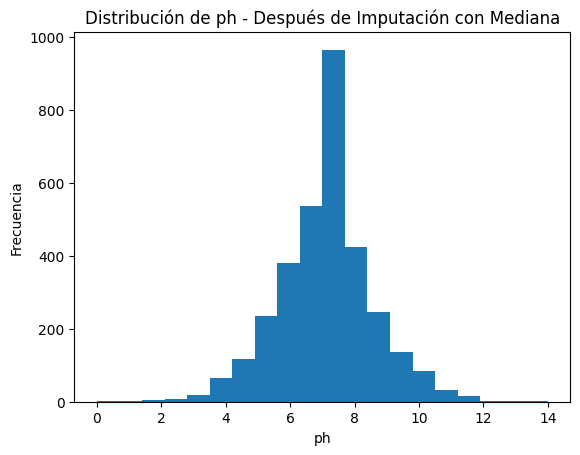

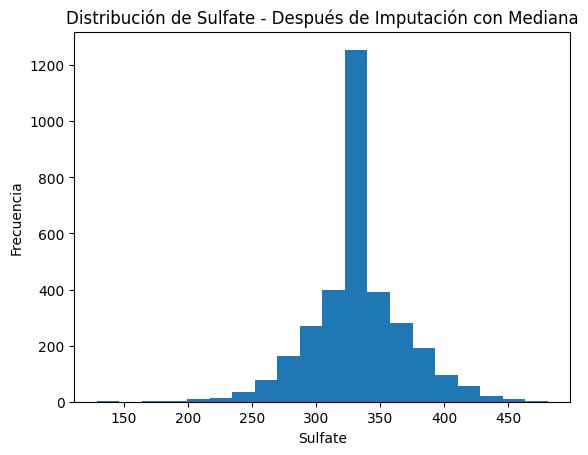

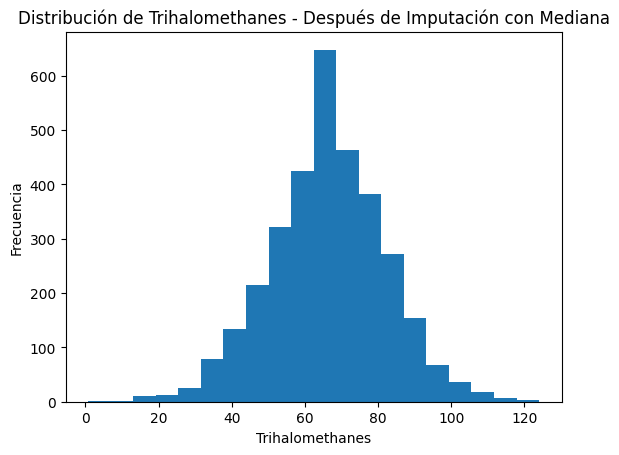

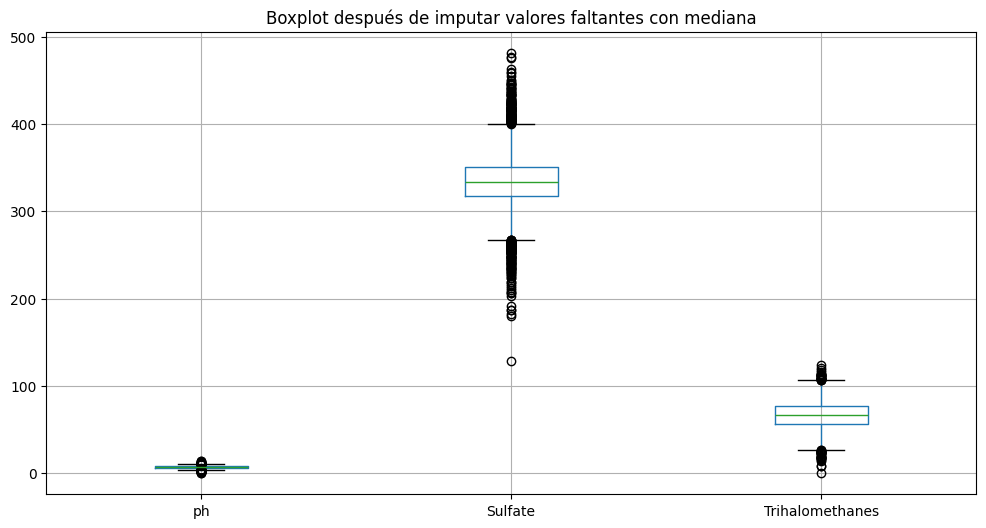

In [3]:
# Histograma después de la imputación con mediana
for column in columns_to_check:
    plt.figure()
    plt.hist(water_potability[column], bins=20)
    plt.title(f'Distribución de {column} - Después de Imputación con Mediana')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplot después de la imputación con mediana
plt.figure(figsize=(12, 6))
water_potability[columns_to_check].boxplot()
plt.title('Boxplot después de imputar valores faltantes con mediana')
plt.show()


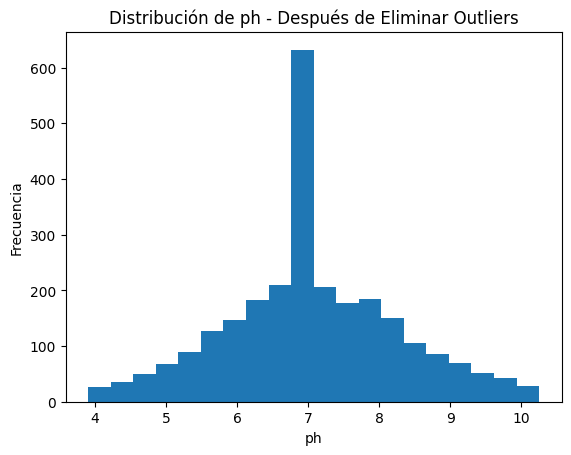

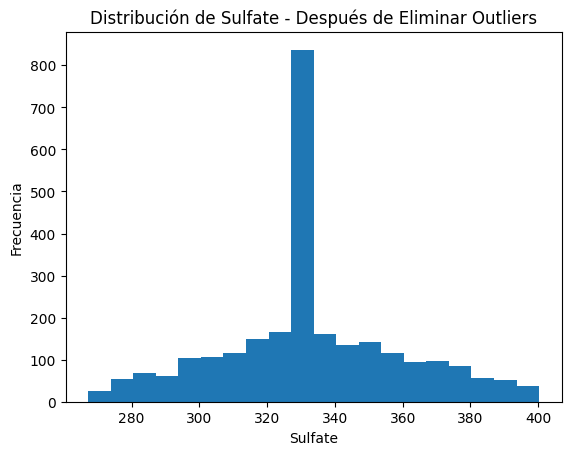

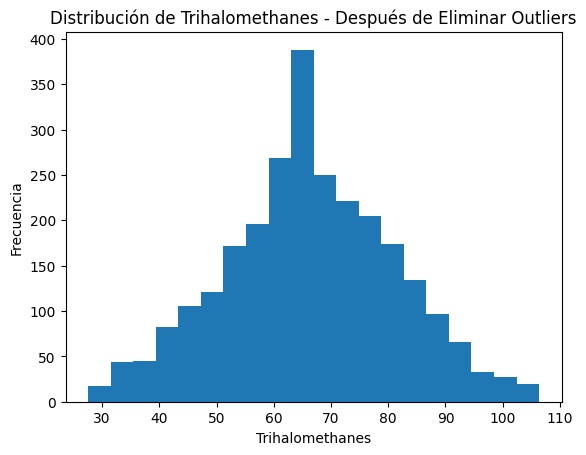

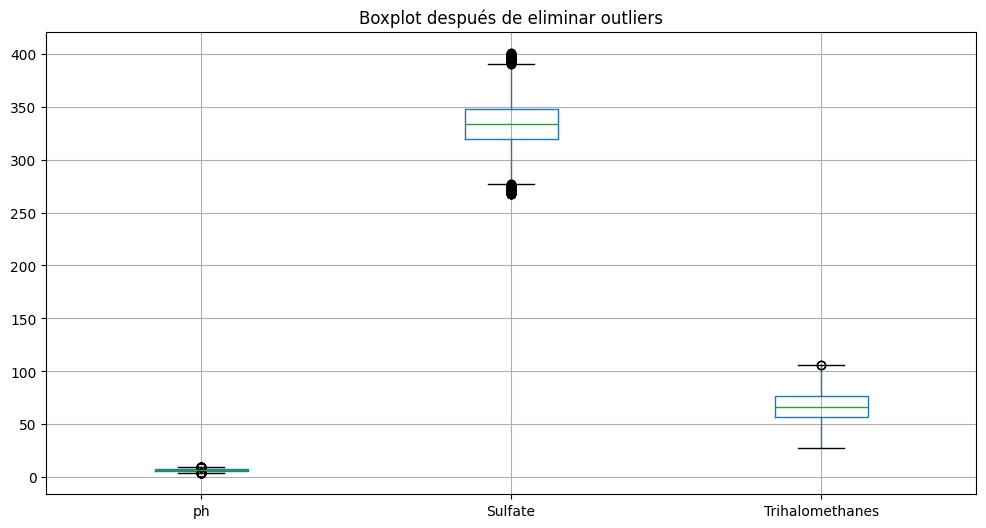

In [4]:
# Histograma después de eliminar outliers
for column in columns_to_check:
    plt.figure()
    plt.hist(water_potability_cleaned[column], bins=20)
    plt.title(f'Distribución de {column} - Después de Eliminar Outliers')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplot después de eliminar outliers
plt.figure(figsize=(12, 6))
water_potability_cleaned[columns_to_check].boxplot()
plt.title('Boxplot después de eliminar outliers')
plt.show()


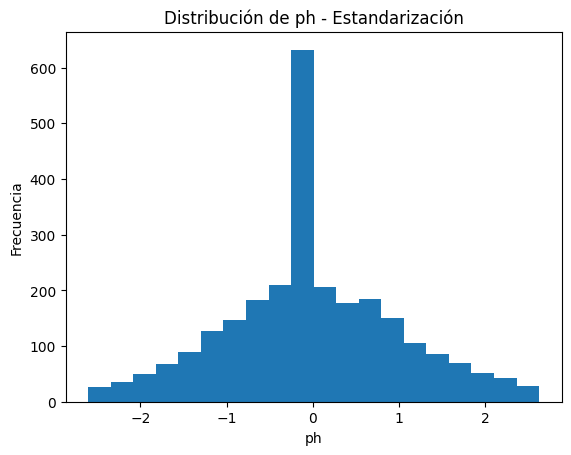

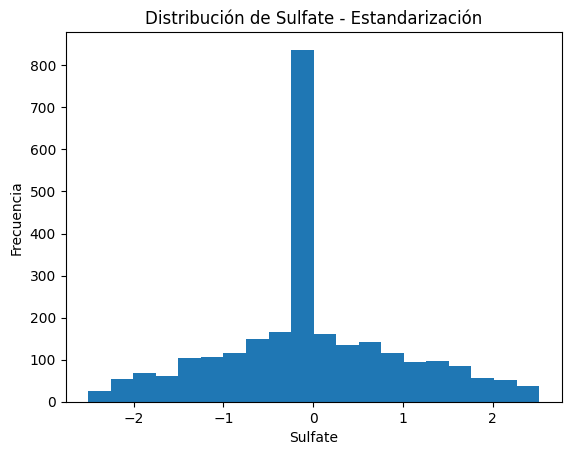

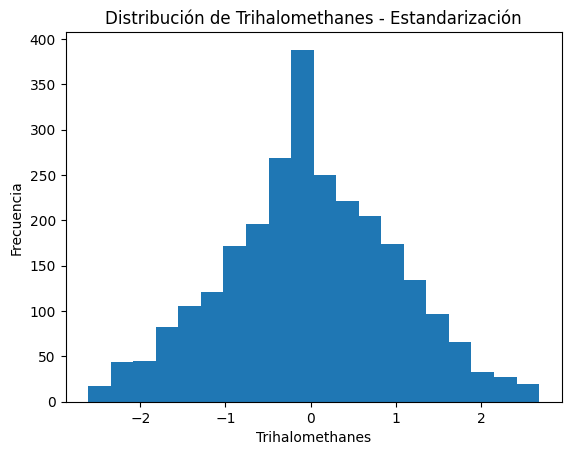

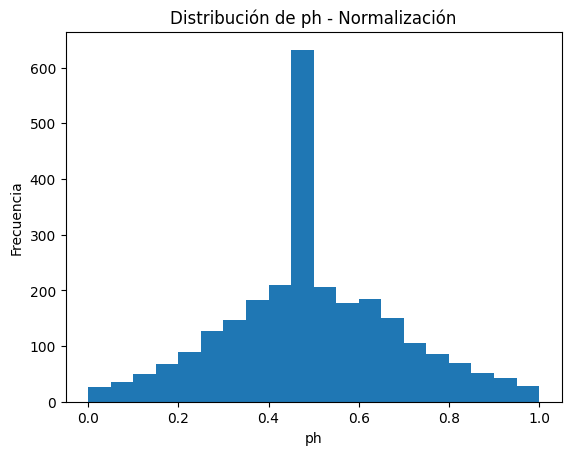

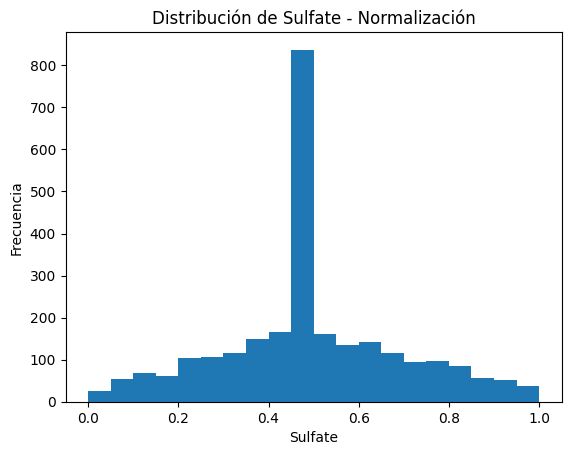

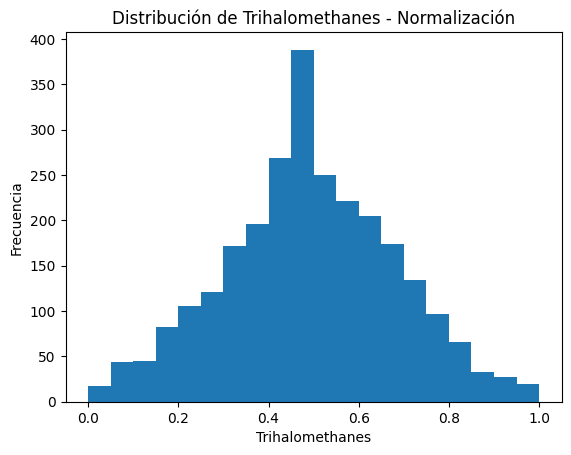

In [5]:
# Histograma después de la estandarización
for column in columns_to_check:
    plt.figure()
    plt.hist(water_potability_scaled[column], bins=20)
    plt.title(f'Distribución de {column} - Estandarización')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Histograma después de la normalización
for column in columns_to_check:
    plt.figure()
    plt.hist(water_potability_normalized[column], bins=20)
    plt.title(f'Distribución de {column} - Normalización')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
